In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("Practice_Fruits.csv")
#in this dataset we have taken 4 features to decide the fruit_label

In [3]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,9.4,8.3,0.55
1,1,apple,granny_smith,188,8.0,7.8,0.59
2,1,apple,granny_smith,181,8.4,7.2,0.60
3,2,malta,mandarin,88,6.2,4.7,0.80
4,2,malta,mandarin,84,7.0,5.6,0.79


In [4]:

features=df[['mass','width','height','color_score']]
labels=df['fruit_label']



In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.3)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=4)
Knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [8]:
print('Accuracy of Knn classifier on training set : {:.2f}'
     .format(Knn.score(X_train,y_train)))

Accuracy of Knn classifier on training set : 0.93


In [9]:
print('Accuracy of Knn classifier on test set : {:.2f}'
     .format(Knn.score(X_test,y_test)))

Accuracy of Knn classifier on test set : 0.84


In [10]:
pred=Knn.predict(X_test)

In [11]:

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))
cmat = confusion_matrix(y_test, pred)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))


              precision    recall  f1-score   support

           1       0.75      1.00      0.86         6
           2       1.00      1.00      1.00         1
           3       1.00      0.40      0.57         5
           4       0.88      1.00      0.93         7

    accuracy                           0.84        19
   macro avg       0.91      0.85      0.84        19
weighted avg       0.88      0.84      0.82        19

TP - True Negative 6
FP - False Positive 0


In [12]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X_train,y_train)
    pred_i = Knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

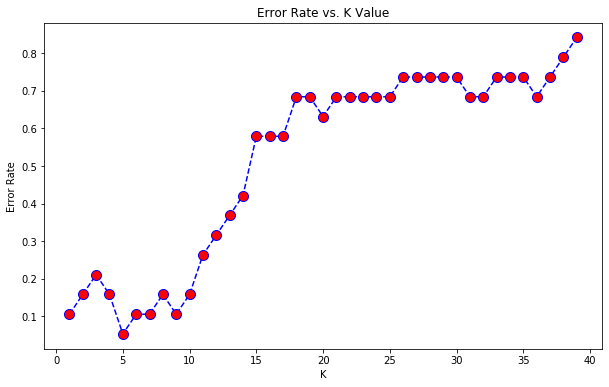

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [14]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
Knn = KNeighborsClassifier(n_neighbors=1)

Knn.fit(X_train,y_train)
pred = Knn.predict(X_test)

print('WITH K=1')
print('\n')
confusion_matrix(y_test,pred)
print('\n')
print(classification_report(y_test,pred))

WITH K=1




              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         1
           3       0.80      0.80      0.80         5
           4       0.86      0.86      0.86         7

    accuracy                           0.89        19
   macro avg       0.91      0.91      0.91        19
weighted avg       0.89      0.89      0.89        19



In [16]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
Knn = KNeighborsClassifier(n_neighbors=4)

Knn.fit(X_train,y_train)
pred = Knn.predict(X_test)

print('WITH K=4')
print('\n')
confusion_matrix(y_test,pred)
print('\n')
print(classification_report(y_test,pred))

WITH K=4




              precision    recall  f1-score   support

           1       0.75      1.00      0.86         6
           2       1.00      1.00      1.00         1
           3       1.00      0.40      0.57         5
           4       0.88      1.00      0.93         7

    accuracy                           0.84        19
   macro avg       0.91      0.85      0.84        19
weighted avg       0.88      0.84      0.82        19

